# CS 3400 Machine Learning - Lab 5: Modelling and Model Error

## Stuart Harley

### Introduction

In this lab we are exploring the effect that model parameters have when modeling data sets. When modeling, the parameter space is what you try to "solve" in order to make your models as accurate as possible. In this lab, we explore manually changing the parameters of two different models in order to visualize the effects. The two models are a guassian distribution and multiple linear regression model.

## Reflection Questions

### 1)

The relationship between the number of independent variables, dependent variables, and model parameters depends on the type of model and the dataset that you are trying to model. For example, a neural network with many layers can have a large number of parameters, a limited amount of independent variables, and multiple dependent variables. While our multiple linear regression model has basically 1:1 independent to parameter values, and 1 dependent value.

### 2)

a. If you gave the model an independent variable not from this dataset (assuming it has the right shape), the model would compute a dependent variable from that input.

b. If the model is a good model, then that resulting output would probably be accurate. However, if the model is a bad model, then the resulting output would probably be inaccurate.

c. You can't be positive but that's the point of training a model, so that it is able to correctly estimate any input it's given. The better trained the model, the better results it will give.

### 3)

a. A different error metric than MAE, is RMSE (Root Mean Squared Error). RMSE is the average of squared differences between the prediction and actual observation. 

b. Both express error in units of the variable of interest. Both metrics range from 0 to infinity and are indifferent to the direction of errors. And they are both negatively-oriented scores, aka lower values are better. However, since RSME squares it values, higher errors are weighted higher. This is useful when larger errors are particularly undesirable.

### 4)

a. You can plot 2 independent variable and 1 dependent variable on the same plot by using a 3d plot.

b. Because it is impossible for us to visualize more than a 3d plot, you can plot more independent variables than 2 by plotting multiple variables on the same axis.

c. If you had a dataset of 100 features and 1 dependent variable I would give up trying to graph this. The graph would be far too cluttered and confusing to be of any use.

d. An error metric can help because instead of visualizing how far away the predicted values are from the actual values, your error metric will give you a value that represents this.

### 5)

The model parameters for experiment 2 performed ok considering I randomly selected them. Compared to the errors from the first experiment though, they were much worse. For a simple way to optimize the parameters, you would just loops through them changing one parameter at a time. Then you would recalculate the error. If the error improves you keep the change, but if it gets worse you revert the change. Then you make another change to the next parameter. You continue looping through all the parameters until you are satisfied with your model.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Experiment 1: Gaussian Distribution

Loading in the gaussian distribution dataset

In [2]:
gauss = np.loadtxt('gaussdist.csv', delimiter=',')

The first column in the dataset is the value (feature variable) and the second column contains the frequency of occurances of that value, out of a total of 1.0 (response variable).

In [3]:
gauss[0:5,:]

array([[6.99000000e+00, 1.56842355e-01],
       [8.90000000e+00, 7.89692304e-03],
       [9.58000000e+00, 1.55088416e-03],
       [5.46000000e+00, 3.18990459e-01],
       [1.38000000e+00, 1.39635489e-03]])

Storing the feature and response variables in separate arrays.

In [4]:
gauss_feat = gauss[:,0]
gauss_resp = gauss[:,1]

Plotting the gaussian distribution dataset

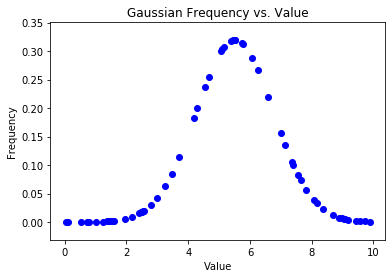

In [5]:
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value');

Gaussian Distribution mathematical formula

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}} $$

The model parameters are sigma (the standard deviation) and mu (the mean).

The independent variable is x.

The dependent variable is f(x).

Defining the gaussian distribution model.

In [6]:
def gaussian(x, sigma=1, mu=0):
    first = 1 / (sigma * math.sqrt(2 * math.pi))
    exponent = (-1/2) * (((x - mu)/sigma) ** 2)
    second = math.exp(1) ** exponent
    return first * second

Generating model predictions using the dataset's feature column and varying parameter sets.

In [7]:
resp_a = gaussian(gauss_feat, sigma=.75, mu=1)
resp_b = gaussian(gauss_feat, sigma=1.25, mu=1)
resp_c = gaussian(gauss_feat, sigma=1.25, mu=5)
resp_d = gaussian(gauss_feat, sigma=1.25, mu=6)

Graphing the model predictions.

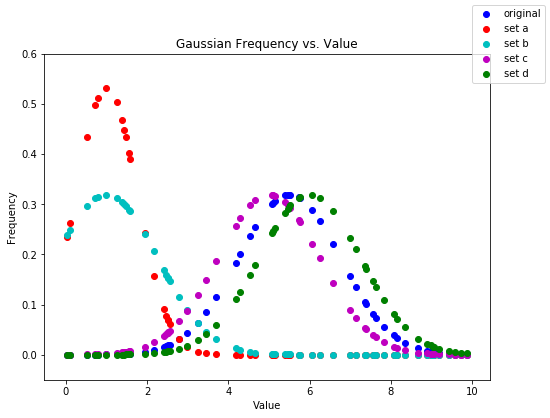

In [8]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(gauss_feat, gauss_resp, color='b', label='original')
axes.scatter(gauss_feat, resp_a, color='r', label='set a')
axes.scatter(gauss_feat, resp_b, color='c', label='set b')
axes.scatter(gauss_feat, resp_c, color='m', label='set c')
axes.scatter(gauss_feat, resp_d, color='g', label='set d')
axes.set_ylim(-.05, .6)
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value');
fig.legend();

Mean Absolute Error mathematical formula

$$ MAE = \frac{\sum_{i=1}^{n}|y_{i} - x_{i}|}{n} $$

The model predictions are y.

The Dependent Variable(s) from the dataset are x.

(Though in reality they are interchangeable because you are taking the absolute value of the difference)

Defining the mean absolute error formula for 2 numpy vectors of the same size.

In [9]:
def mae(x, y):
    return np.sum(abs(np.subtract(y, x))) / x.size

Calculating the MAE between each model prediction and the dataset data.

In [10]:
mae_a = mae(gauss_resp, resp_a)
mae_b = mae(gauss_resp, resp_b)
mae_c = mae(gauss_resp, resp_c)
mae_d = mae(gauss_resp, resp_d)

Plotting the data again and adding the mae values to the legend.

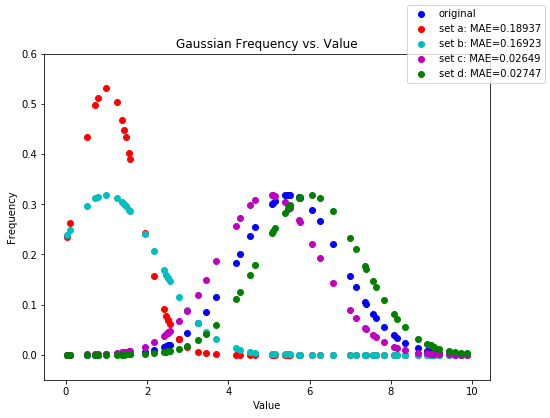

In [11]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(gauss_feat, gauss_resp, color='b', label='original')
axes.scatter(gauss_feat, resp_a, color='r',\
             label='set a: MAE=' + str(round(mae_a, 5)))
axes.scatter(gauss_feat, resp_b, color='c',\
             label='set b: MAE=' + str(round(mae_b, 5)))
axes.scatter(gauss_feat, resp_c, color='m',\
             label='set c: MAE=' + str(round(mae_c, 5)))
axes.scatter(gauss_feat, resp_d, color='g',\
             label='set d: MAE=' + str(round(mae_d, 5)))
axes.set_ylim(-.05, .6)
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value');
fig.legend();

### Experiment 2: Multiple Linear Regression Model

Loading in the advertising data set

In [12]:
adv = np.loadtxt('advertising.csv', skiprows=1, delimiter=',')

The first column is just the index. The final column is the sales column which is the dependent variable. The middle columns are offset, tv, radio, and newspaper respectfully.

In [13]:
adv[0:5,:]

array([[  1. ,   1. , 230.1,  37.8,  69.2,  22.1],
       [  2. ,   1. ,  44.5,  39.3,  45.1,  10.4],
       [  3. ,   1. ,  17.2,  45.9,  69.3,   9.3],
       [  4. ,   1. , 151.5,  41.3,  58.5,  18.5],
       [  5. ,   1. , 180.8,  10.8,  58.4,  12.9]])

Storing each feature and response variable column in a separate array.

In [14]:
offset = adv[:,1]
tv = adv[:,2]
radio = adv[:,3]
newspaper = adv[:,4]
sales = adv[:,5]

Plotting each feature variable vs the dependent variable (sales).

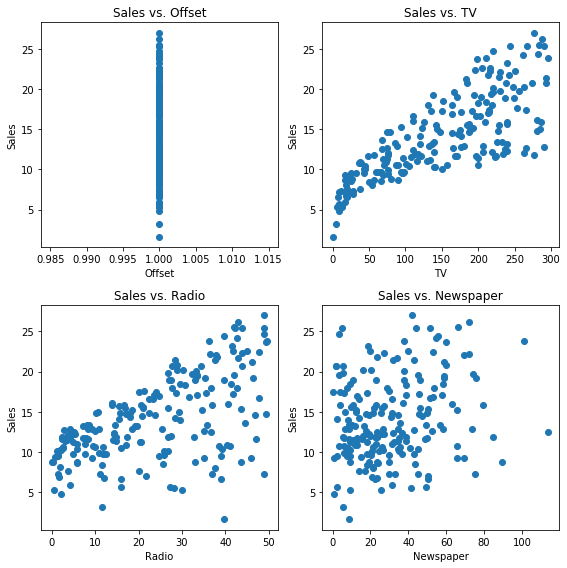

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
axes[0,0].scatter(offset, sales)
axes[0,0].set_xlabel('Offset')
axes[0,0].set_ylabel('Sales')
axes[0,0].set_title('Sales vs. Offset')
axes[0,1].scatter(tv, sales)
axes[0,1].set_xlabel('TV')
axes[0,1].set_ylabel('Sales')
axes[0,1].set_title('Sales vs. TV')
axes[1,0].scatter(radio, sales)
axes[1,0].set_xlabel('Radio')
axes[1,0].set_ylabel('Sales')
axes[1,0].set_title('Sales vs. Radio')
axes[1,1].scatter(newspaper, sales)
axes[1,1].set_xlabel('Newspaper')
axes[1,1].set_ylabel('Sales')
axes[1,1].set_title('Sales vs. Newspaper')
fig.tight_layout();

Multiple Linear Regression Formula

$$ y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip} $$

The model parameters are the betas. Aka the weights. (B0 is the y intercept)

The independent variables are the x's.

The dependent variable is y.

Defining the multiple linear Regression Formula using 4 independent variables.

In [16]:
def lin_reg(x1, x2, x3, x4, b0=0, b1=1, b2=1, b3=1, b4=1):
    return b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4

Defining 2 sets of model parameters.

1: offset weight = .01, tv weight = .05, radio weight = .03, newspaper weight = .02

2: offset weight = .7, tv weight = .1, radio weight = .1, newspaper weight = .1

Generating model predictions using feature columns and parameter sets.

In [17]:
pred_1 = lin_reg(offset, tv, radio, newspaper, b1=.01, b2=.05, b3=.03, b4=.02)
pred_2 = lin_reg(offset, tv, radio, newspaper, b1=.7, b2=.1, b3=.1, b4=.1)

Calculating the MAE between each model prediction and the dataset data.

In [18]:
mae1 = mae(sales, pred_1)
mae2 = mae(sales, pred_2)

Plotting the predicted values.

Parameter Set 1 Predicted Sales


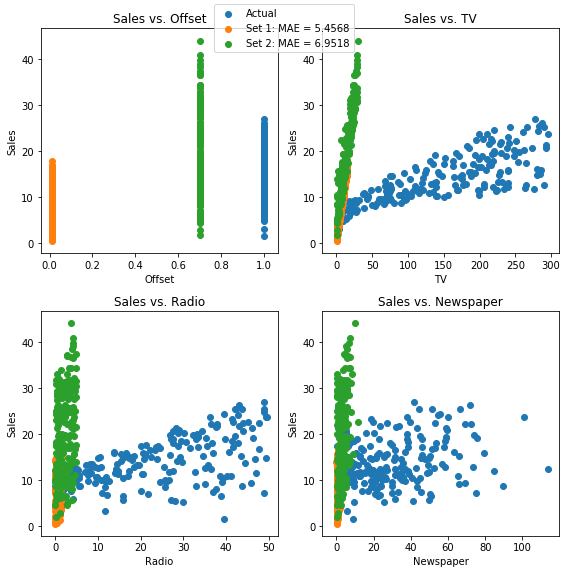

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
axes[0,0].scatter(offset, sales, label='Actual')
axes[0,0].scatter(offset*.01, pred_1, label='Set 1: MAE = ' +\
                  str(round(mae1, 4)))
axes[0,0].scatter(offset*.7, pred_2, label='Set 2: MAE = ' +\
                  str(round(mae2, 4)))
axes[0,0].set_xlabel('Offset')
axes[0,0].set_ylabel('Sales')
axes[0,0].set_title('Sales vs. Offset')
axes[0,1].scatter(tv, sales)
axes[0,1].scatter(tv*.05, pred_1)
axes[0,1].scatter(tv*.1, pred_2)
axes[0,1].set_xlabel('TV')
axes[0,1].set_ylabel('Sales')
axes[0,1].set_title('Sales vs. TV')
axes[1,0].scatter(radio, sales)
axes[1,0].scatter(radio*.03, pred_1)
axes[1,0].scatter(radio*.1, pred_2)
axes[1,0].set_xlabel('Radio')
axes[1,0].set_ylabel('Sales')
axes[1,0].set_title('Sales vs. Radio')
axes[1,1].scatter(newspaper, sales)
axes[1,1].scatter(newspaper*.02, pred_1)
axes[1,1].scatter(newspaper*.1, pred_2)
axes[1,1].set_xlabel('Newspaper')
axes[1,1].set_ylabel('Sales')
axes[1,1].set_title('Sales vs. Newspaper')
fig.tight_layout()
fig.legend(loc=9);
print('Parameter Set 1 Predicted Sales')

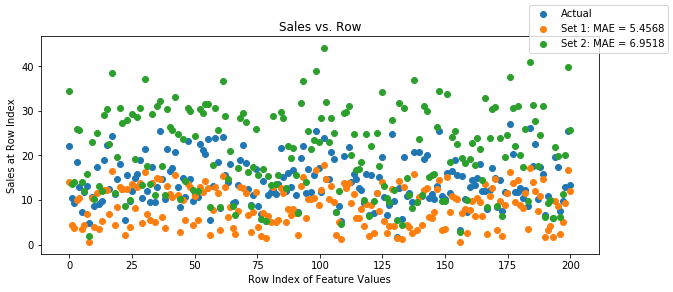

In [20]:
fig, axes = plt.subplots(figsize=(10, 4))
axes.scatter(np.linspace(0, sales.size, sales.size), sales, label='Actual')
axes.scatter(np.linspace(0, pred_1.size, pred_1.size), pred_1,\
            label='Set 1: MAE = ' + str(round(mae1, 4)))
axes.scatter(np.linspace(0, pred_2.size, pred_2.size), pred_2,\
            label='Set 2: MAE = ' + str(round(mae2, 4)))
axes.set_xlabel('Row Index of Feature Values')
axes.set_ylabel('Sales at Row Index')
axes.set_title('Sales vs. Row')
fig.legend();

The plot directly above shows the sales / predicted sales for each row of the feature matrix. Therefore, it can be seen that set 1's parameter values most often underestimated the actual sales while set 2's parameter values are more likely to overestimate.